- [Main Code](#main-code)
- [Step by step code flow](#step-by-step-code-flow)

### Main code

In [71]:
"""
Just to verify the softmax performed correctly or not.
We can check for each row, the sum is 1 or not.
"""

import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for i in range(0, 10):
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
        
    print(loss_sum)

model.eval()
with torch.no_grad():
    accurate = 0
    total = 0
    for X, y in test_dataloader:
        X = X.reshape((-1, 784))

        outputs = nn.functional.softmax(model(X), dim=1)
        # print(outputs)
        # print(outputs.sum(dim=1))
        # break
        correct_pred = (y == outputs.max(dim=1).indices)
        total+=correct_pred.size(0)
        accurate+=correct_pred.type(torch.int).sum().item()
    print(accurate / total)

584.1548855304718
257.81406203005463
177.2617400176823
135.3571248255903
105.65422605909407
84.93627719237702
71.35938975325553
56.60338619790855
48.814835347642656
40.45410399796674
0.9773


### Step by step code flow

In [1]:
import torch
from torch import nn

import torchvision.datasets as datasets

In [2]:
mnist_train = datasets.MNIST(root='./data', download=True, train=True)
print(mnist_train[2])

100%|█████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 460kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:00<00:00, 4.08MB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 2.26MB/s]

(<PIL.Image.Image image mode=L size=28x28 at 0x23DE6EABBF0>, 4)


In [3]:
print(mnist_train[2]) # It is just a tuple

(<PIL.Image.Image image mode=L size=28x28 at 0x23DE6EEE270>, 4)


In [4]:
mnist_train[2][0] # Access the image

In [5]:
"""
We cannot directly print the image
"""
print(mnist_train[2][0])

<PIL.Image.Image image mode=L size=28x28 at 0x23DE9D649E0>


In [6]:
"""
So use numpy array
"""
import numpy as np

print(np.array(mnist_train[2][0]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [7]:
"""
We have training data and test data.
This one is test data(train = False)
"""
mnist_test = datasets.MNIST(root='./data', download=True, train=False)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test


In [9]:
"""
We need X and y data for traing the model.
So let's convert the data into tensor.
"""
import torch
from torch import nn
import torchvision.datasets as datasets

mnist_train = datasets.MNIST(root='./data', download=True, train=True)
mnist_test = datasets.MNIST(root='./data', download=True, train=False)

print(torch.tensor(mnist_train[4][0]))

RuntimeError: Could not infer dtype of Image

In [11]:
"""
When converting to tensor. We are getting an error.
So convert into numpy array then to Pytorch tensor.
"""
import torch
from torch import nn
import torchvision.datasets as datasets
import numpy as np

mnist_train = datasets.MNIST(root='./data', download=True, train=True)
mnist_test = datasets.MNIST(root='./data', download=True, train=False)

print(torch.tensor(np.array(mnist_train[4][0])))

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [12]:
"""
We cannot do manually for all the images right.
So use ToTensor.
"""

import torch
from torch.utils.data import DataLoader
from torch import nn
import numpy as np
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

# print(torch.tensor(np.array(mnist_train[4][0])))

print(mnist_train[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [20]:
"""
If you see the above output it got tensor data.
If you correctly observe the last values is the prediction(5).
"""
"""
# We cannot do this. we can only get individual entry.
"""

# print(mnist_train[0:32])  # We cannot do this. we can only get individual entry.


'\n# We cannot do this. we can only get individual entry.\n'

In [21]:
"""
We can use DataLoader for loading the data.
"""
train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

In [23]:
"""
See how the data is loaded
"""

for X, y in train_dataloader:
    print(X.shape) # 32 entries, 1 color, image size of 28*28
    print(y.shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [24]:
"""
See how the data is loaded
"""

for X, y in train_dataloader:
    print(X)
    print(y)
    break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [25]:
"""
So let write a basic model for training
"""

import torch
from torch.utils.data import DataLoader
from torch import nn
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())
train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 100), # 28*28 = 784 as inputs, 100 as outputs
    nn.ReLU(),
    nn.Linear(100, 1)
)

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for i in range(0, 10):
    loss_sum = 0
    for X, y in train_dataloader:
        print(X.shape)
        print(y)
        break
    break

torch.Size([32, 1, 28, 28])
tensor([8, 0, 5, 7, 6, 8, 1, 4, 5, 9, 9, 8, 9, 6, 0, 6, 0, 2, 4, 3, 9, 5, 6, 2,
        5, 8, 0, 4, 1, 2, 6, 2])


In [36]:
"""
For X, torch.Size([32, 1, 28, 28]) ===> We need to pass like [32, 784]
- We can do that by saying reshape((-1, 784)) ===> So it can use 32 as 1st dimension, 784 as the 2nd dimension

For y, predict 0 or 1 i.e, True or False then to pytorch tensor
- Output should be [32, 1] ==> 32 entries with 1 output

This is all based on the below training loop for 1 iteration.
"""

import torch
from torch.utils.data import DataLoader
from torch import nn
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())
train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 100), # 28*28 = 784 as inputs, 100 as outputs
    nn.ReLU(),
    nn.Linear(100, 1)
)

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for i in range(0, 10):
    loss_sum = 0
    for X, y in train_dataloader:
        # print(X.shape)
        # print((y == 0).type(torch.float32).reshape((-1,1)).shape )
        X = X.shape
        y = (y == 0).type(torch.float32).reshape((-1,1))
        break
    break

In [37]:
"""
Write a basic training loop
"""
import torch
from torch.utils.data import DataLoader
from torch import nn

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for i in range(0, 10):
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = (y == 0).type(torch.float32).reshape((-1, 1))

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
        
    print(loss_sum)

73.50408655361389
34.46827866281092
21.97859491969757
15.341060949303937
11.049312939212768
8.313223635205873
6.876410293377035
5.456966209965401
4.469970883579144
3.7012725292022286


In [42]:
"""
Lets evaluate the model
"""
import torch
from torch.utils.data import DataLoader
from torch import nn

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for i in range(0, 10):
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = (y == 0).type(torch.float32).reshape((-1, 1))

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
        
    print(loss_sum)

print("=====")

model.eval()
with torch.no_grad():
    accurate = 0
    total = 0
    for X, y in test_dataloader:
        X = X.reshape((-1, 784))
        y = (y == 0).reshape((-1, 1))

        outputs = nn.functional.sigmoid(model(X))
        correct_pred = ((outputs > 0.5) == y)
        # print(correct_pred.shape)  # Most of them are [32, 1]
        total+=correct_pred.size(0)  # we are interested in the 1st element only(32) ==> 32 + 32 +...+16

        # print(correct_pred.type(torch.int).sum().item()) # How many entries for the mini batch are predicted correctly
        accurate+=correct_pred.type(torch.int).sum().item()
    print(accurate / total)

72.25947421272213
33.54471928936255
20.158424809904318
16.095016141613087
11.670341578069838
9.006008473259442
6.645463079788868
6.012349796710296
4.118369338201489
3.7743825657652814
=====
0.9978


In [44]:
"""
FYI, Till now we only detected for 0 or Not 0.
"""

'\nFYI, Till now we only detected for 0 or Not 0.\n'

In [45]:
"""
Use onehot encoding for this
"""
import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


for i in range(0, 10):
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32) 
        """
        Sometimes, in the minibatch, the max. value can 8 but there is no 9. 
        So it is going to generate only till 8 values. ie. values till 8th index not 9th index.
        """
        print(y.shape)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
        
    print(loss_sum)

#model.eval()
#with torch.no_grad():
#    accurate = 0
#    total = 0
#    for X, y in test_dataloader:
#        X = X.reshape((-1, 784))
#        y = (y == 0).reshape((-1, 1))
#
#        outputs = nn.functional.sigmoid(model(X))
#        correct_pred = ((outputs > 0.5) == y)
#        total+=correct_pred.size(0)
#
#        accurate+=correct_pred.type(torch.int).sum().item()
#    print(accurate / total)


torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([3

In [46]:
import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for i in range(0, 10):
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
        
    print(loss_sum)

model.eval()
with torch.no_grad():
    accurate = 0
    total = 0
    for X, y in test_dataloader:
        X = X.reshape((-1, 784))
        # y = F.one_hot(y, num_classes=10).type(torch.float32)

        outputs = nn.functional.sigmoid(model(X))
        print(outputs.sum(dim=1))
        #print(y)
        #print(outputs.max(dim=1).indices) # Only apply to specific dimension. Check the max in each row. where the max value is there
        #print(outputs)
        #break
        correct_pred = (y == outputs.max(dim=1).indices) # Compare the y with the predicted outputs
        total+=correct_pred.size(0)  # we are interested in the 1st element only(32) ==> 32 + 32 +...+16
        accurate+=correct_pred.type(torch.int).sum().item()
    print(accurate / total)

139.39919180888683
63.90871516801417
46.876843732083216
37.18962526402902
31.035263778292574
26.58261927845888
23.5695522230817
20.706723617680836
18.370211640227353
16.67507220330299
tensor([1.0033, 1.0000, 1.1688, 1.0001, 1.0000, 1.0000, 1.0058, 1.0004, 1.0000,
        1.0024, 1.0000, 1.0026, 1.0124, 1.0000, 1.0025, 1.1012, 1.0015, 0.9992,
        1.2068, 1.0000, 0.9969, 0.8908, 0.9999, 1.0002, 1.0008, 0.9970, 1.0000,
        1.0000, 1.0092, 1.0001, 1.0000, 1.0064])
tensor([1.0032, 0.9508, 1.0000, 1.0002, 0.7673, 1.0000, 1.0798, 1.0000, 1.0000,
        1.0028, 0.8110, 1.0000, 1.0003, 1.0466, 1.0269, 0.9878, 1.0004, 0.9988,
        1.0018, 1.0024, 0.9975, 1.0121, 1.0020, 1.0027, 1.0428, 1.0003, 1.0012,
        0.9996, 1.0131, 1.0004, 1.0026, 0.9989])
tensor([1.0000, 1.0001, 0.9973, 1.0000, 1.0000, 1.0002, 1.0001, 1.0001, 1.0003,
        1.0004, 1.0000, 1.0014, 1.0000, 1.0000, 0.3508, 1.0004, 1.0000, 0.9981,
        1.0017, 1.0000, 1.0001, 0.9999, 1.0001, 1.0034, 1.0003, 1.0002, 1.0000

In [47]:
"""
The outputs.sum(dim=1) will not equal to probability of 1 or 100 percent. It all varies based on the prediction.
"""

'\nThe outputs.sum(dim=1) will not equal to probability of 1 or 100 percent. It all varies based on the prediction.\n'

In [50]:
"""
So to main all the probabilities sum to 1.
We are using Softmax.
How to apply softmax?
- Training:
    = torch.nn.CrossEntropyLoss()
- Prediction:
    = torch.nn.functional.softmax 
"""

import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for i in range(0, 10):
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
        
    print(loss_sum)

model.eval()
with torch.no_grad():
    accurate = 0
    total = 0
    for X, y in test_dataloader:
        X = X.reshape((-1, 784))

        outputs = nn.functional.softmax(model(X)) 
        print(outputs)
        break
        correct_pred = (y == outputs.max(dim=1).indices)
        total+=correct_pred.size(0)
        accurate+=correct_pred.type(torch.int).sum().item()
    print(accurate / total)

594.024518404156
275.7379941176623
189.89786026673391
145.4313488692278
115.22082892118488
94.9300536311348
75.22317549865693
61.94192484795349
51.90845606039511
43.41552127870091
tensor([[1.7474e-10, 2.8900e-09, 5.6698e-08, 2.9262e-07, 1.5022e-04, 2.1228e-07,
         3.6585e-14, 7.8376e-06, 5.4661e-07, 9.9984e-01],
        [1.0000e+00, 4.6381e-09, 1.2154e-06, 9.1723e-10, 1.1059e-14, 3.9066e-09,
         3.5681e-07, 1.2790e-10, 9.1653e-12, 3.6348e-08],
        [1.5720e-10, 1.4056e-07, 2.7492e-08, 1.9741e-07, 2.7533e-10, 1.8812e-04,
         9.9981e-01, 8.7288e-13, 1.4602e-07, 3.1135e-14],
        [2.4990e-12, 1.3223e-09, 3.6518e-05, 5.1904e-08, 9.9995e-01, 1.0226e-09,
         6.7369e-12, 5.5128e-08, 3.8540e-07, 1.2075e-05],
        [1.2916e-16, 3.9981e-11, 4.8399e-10, 1.0000e+00, 6.4933e-17, 4.7509e-07,
         3.0820e-19, 2.1101e-17, 1.3733e-11, 2.3336e-11],
        [2.7872e-10, 8.9552e-12, 3.2889e-09, 4.2583e-10, 7.8272e-15, 2.3709e-08,
         7.0293e-22, 1.0000e+00, 3.1470e-11,

C:\Users\gta\AppData\Local\Temp\ipykernel_6504\3407139814.py:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = nn.functional.softmax(model(X))


ZeroDivisionError: division by zero

In [51]:
"""
Not only applying softmax function. we need to tell where it need to be apllied.
The dimension
"""

import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for i in range(0, 10):
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
        
    print(loss_sum)

model.eval()
with torch.no_grad():
    accurate = 0
    total = 0
    for X, y in test_dataloader:
        X = X.reshape((-1, 784))

        outputs = nn.functional.softmax(model(X), dim=1) 
        print(outputs)
        break
        correct_pred = (y == outputs.max(dim=1).indices)
        total+=correct_pred.size(0)
        accurate+=correct_pred.type(torch.int).sum().item()
    print(accurate / total)


579.1526172291487
265.6337162768468
184.0833850572817
143.1725130013656
112.1033219996607
90.81045646767598
73.83956130995648
60.28868365274684
51.81958459399175
43.5491581728711
tensor([[2.4077e-13, 1.8673e-12, 3.4548e-12, 1.0000e+00, 1.2468e-19, 3.0916e-09,
         7.0438e-25, 9.4544e-13, 7.7404e-14, 7.7542e-08],
        [2.0033e-13, 1.1050e-13, 6.8236e-13, 1.0000e+00, 1.5383e-13, 5.2240e-10,
         1.3238e-17, 4.9445e-11, 1.9538e-13, 7.4737e-16],
        [1.8286e-10, 9.9994e-01, 1.9873e-05, 1.8597e-08, 3.3401e-08, 4.5107e-09,
         3.0733e-08, 2.0344e-05, 2.1214e-05, 4.7488e-10],
        [7.8211e-04, 5.5007e-08, 1.8155e-05, 5.8390e-08, 7.3475e-01, 2.2929e-05,
         2.6419e-01, 3.2426e-06, 6.2625e-08, 2.3117e-04],
        [2.9014e-11, 1.2414e-09, 1.0000e+00, 7.6875e-08, 2.2837e-11, 8.4685e-11,
         9.1996e-11, 4.9252e-08, 1.7622e-09, 3.5417e-10],
        [5.5746e-10, 1.3320e-17, 1.2571e-10, 2.4808e-14, 4.0249e-09, 3.3402e-14,
         1.0000e+00, 1.3244e-15, 2.1141e-12, 

ZeroDivisionError: division by zero

In [57]:
"""
Just to verify the softmax performed correctly or not.
We can check for each row, the sum is 1 or not.
"""

import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for i in range(0, 10):
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
        
    print(loss_sum)

model.eval()
with torch.no_grad():
    accurate = 0
    total = 0
    for X, y in test_dataloader:
        X = X.reshape((-1, 784))

        outputs = nn.functional.softmax(model(X), dim=1)
        print(outputs)
        print(outputs.sum(dim=1))
        break
    #     correct_pred = (y == outputs.max(dim=1).indices)
    #     total+=correct_pred.size(0)
    #     accurate+=correct_pred.type(torch.int).sum().item()
    # print(accurate / total)


591.1932414378971
268.6300385873765
182.9760554137174
138.67166823684238
109.42683525488246
90.60118021338712
73.57475740052178
57.13292916413047
50.03227179230453
39.935561723257706
tensor([[8.2952e-15, 2.2097e-12, 1.0794e-09, 4.9739e-11, 9.9997e-01, 4.2848e-12,
         9.9641e-13, 1.4783e-08, 4.6217e-08, 3.0522e-05],
        [3.0129e-12, 9.1579e-09, 5.5819e-08, 5.3982e-05, 2.4532e-11, 1.7929e-05,
         1.4137e-09, 9.3583e-08, 9.9992e-01, 4.7315e-06],
        [1.1639e-04, 6.1772e-10, 2.4523e-07, 1.6721e-08, 1.0518e-07, 3.6565e-05,
         9.9981e-01, 1.2379e-10, 3.1805e-05, 1.2168e-11],
        [7.9533e-06, 1.2411e-07, 1.5775e-02, 9.2716e-01, 1.3217e-03, 1.9925e-02,
         4.3193e-03, 2.1345e-07, 3.0584e-02, 9.0827e-04],
        [2.5275e-09, 5.9849e-11, 6.4209e-08, 8.3570e-07, 1.7825e-13, 3.4485e-10,
         2.6391e-09, 1.6528e-11, 1.0000e+00, 3.1473e-07],
        [1.1753e-11, 7.7339e-11, 5.5083e-09, 7.4690e-10, 3.6780e-16, 3.1121e-11,
         2.8881e-13, 6.0367e-12, 1.0000e+

In [62]:
"""
32 entries for each tensor data.. and in that each entry it has size of 10 elements.
So the above output was only calculating the each entry list.. so there will be 32 1's
"""
outputs.shape

torch.Size([16, 10])

In [63]:
"""
Just to verify the softmax performed correctly or not.
We can check for each row, the sum is 1 or not.
"""

import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for i in range(0, 10):
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
        
    print(loss_sum)

model.eval()
with torch.no_grad():
    accurate = 0
    total = 0
    for X, y in test_dataloader:
        X = X.reshape((-1, 784))

        outputs = nn.functional.softmax(model(X), dim=1)
        # print(outputs)
        # print(outputs.sum(dim=1))
        # break
        correct_pred = (y == outputs.max(dim=1).indices)
        total+=correct_pred.size(0)
        accurate+=correct_pred.type(torch.int).sum().item()
    print(accurate / total)


588.5535277798772
263.25320653105155
182.74594761105254
139.7427581057418
107.867569147842
88.15619343183062
70.70822891651187
61.20823941437993
49.19443545486138
41.58399147322052
0.9768


In [61]:
"""
Let's include an additional layer.
"""

import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for i in range(0, 10):
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
        
    print(loss_sum)

model.eval()
with torch.no_grad():
    accurate = 0
    total = 0
    for X, y in test_dataloader:
        X = X.reshape((-1, 784))

        outputs = nn.functional.softmax(model(X), dim=1)

        correct_pred = (y == outputs.max(dim=1).indices)
        total+=correct_pred.size(0)
        accurate+=correct_pred.type(torch.int).sum().item()
    print(accurate / total)


587.0279706586152
237.46422874368727
167.62345519743394
128.5955175406416
104.46048349040211
85.10575158472057
74.37263993650049
61.18037894606823
53.712918230403375
49.22602279304192
0.9762


In [64]:
"""
If you observe there is not much difference in the accuracy.
We can increase the layers, but it may get overfitting.
"""
import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
mnist_train = torch.utils.data.Subset(
    datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor()),
    list(range(1000))
)
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for i in range(0, 10):
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
        
    print(loss_sum)

model.eval()
with torch.no_grad():
    accurate = 0
    total = 0
    for X, y in test_dataloader:
        X = X.reshape((-1, 784))

        outputs = nn.functional.softmax(model(X), dim=1)

        correct_pred = (y == outputs.max(dim=1).indices)
        total+=correct_pred.size(0)
        accurate+=correct_pred.type(torch.int).sum().item()
    print(accurate / total)

58.47277212142944
28.75107416510582
18.17414018511772
13.668722063302994
11.007689468562603
9.496382348239422
7.834252081811428
6.723496347665787
5.934362463653088
5.1797596625983715
0.875


In [66]:
list(range(1000))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


[2.146012384444475, 1.226111439988017, 0.6256267223507166, 0.3898988482542336, 0.3368230597116053, 0.2422839084174484, 0.1660254776943475, 0.12988175195641816, 0.11142282118089497, 0.0706327497609891]
[1.8012735763677774, 0.9062005157668751, 0.6683355042347893, 0.6213912675365473, 0.48810963111277966, 0.5168979214355588, 0.563136637924959, 0.5571046507182403, 0.5292165318188576, 0.6104920834255295]


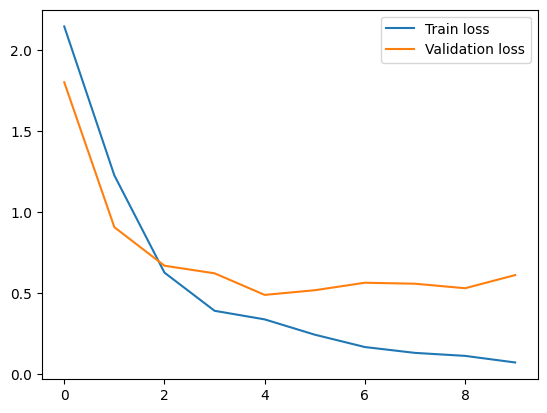

In [70]:
"""
explore overfitting loss
"""

import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
mnist_train = torch.utils.data.Subset(
    datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor()),
    list(range(1000))
)
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

import matplotlib.pyplot as plt

model = nn.Sequential(
    nn.Linear(784, 500),
    nn.ReLU(),
    nn.Linear(500, 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []
for i in range(0, 10):
    model.train()
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
    train_losses.append(loss_sum / len(train_dataloader))

    val_loss_sum = 0
    model.eval()
    with torch.no_grad():
        for X, y in test_dataloader:
            X = X.reshape((-1, 784))
            y = F.one_hot(y, num_classes=10).type(torch.float32) 
            outputs = model(X)
            loss = loss_fn(outputs, y)
            val_loss_sum+=loss.item()
    val_losses.append(val_loss_sum / len(test_dataloader))
        

print(train_losses)
print(val_losses)
plt.plot(train_losses, label="Train loss")
plt.plot(val_losses, label="Validation loss")
plt.legend()
plt.show()

[0.3613233682235082, 0.189343578094244, 0.1414008922331035, 0.11350676682641109, 0.09519020044337959, 0.08145491630993784, 0.07020510527274261, 0.06158176900390536, 0.05468902100523313, 0.049664795263825605]
[0.21499435235255251, 0.1575985003393679, 0.1319778413026811, 0.11513407122694884, 0.10510495665911644, 0.10455138057755967, 0.10561348893940033, 0.08740780434717005, 0.0900312121994734, 0.08824124820244025]


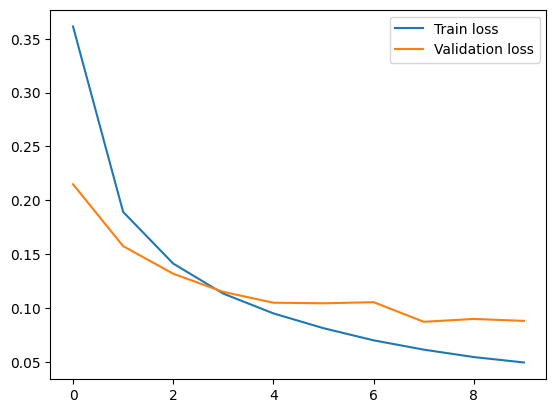

In [69]:
"""
Solution for the overfitting problem
"""

import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

import matplotlib.pyplot as plt

model = nn.Sequential(
    nn.Linear(784, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []
for i in range(0, 10):
    model.train()
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
    train_losses.append(loss_sum / len(train_dataloader))

    val_loss_sum = 0
    model.eval()
    with torch.no_grad():
        for X, y in test_dataloader:
            X = X.reshape((-1, 784))
            y = F.one_hot(y, num_classes=10).type(torch.float32) 
            outputs = model(X)
            loss = loss_fn(outputs, y)
            val_loss_sum+=loss.item()
    val_losses.append(val_loss_sum / len(test_dataloader))
        

print(train_losses)
print(val_losses)
plt.plot(train_losses, label="Train loss")
plt.plot(val_losses, label="Validation loss")
plt.legend()
plt.show()

In [77]:
"""
Save the model
"""
import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []
for i in range(0, 10):
    model.train()
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
    train_losses.append(loss_sum / len(train_dataloader))

print(train_losses)

torch.save(model.state_dict(), './data/mnist-model.pth')

[0.3545190253029267, 0.1655944964831074, 0.12017499331546326, 0.09610501464568079, 0.07965575569011271, 0.06843223353245606, 0.05904244126568859, 0.049831691375467925, 0.04449746363940649, 0.04037955001646963]


In [88]:
"""
Lets perform the inference
"""

import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

from torchvision.transforms import ToTensor

from PIL import Image

model = nn.Sequential(
    nn.Linear(784, 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)
model.load_state_dict(torch.load('./data/mnist-model.pth', weights_only=True))

img = Image.open("./data/4_2.png")
img.thumbnail((28, 28)) #It will resize to (28,28) of required
img = img.convert('L') # Convert into grey scale

t = ToTensor()
X = t(img).reshape((-1, 784))
print(X.shape)
outputs = model(X)
print(nn.functional.softmax(outputs, dim=1))

torch.Size([1, 784])
tensor([[4.6498e-07, 1.8053e-12, 1.4867e-09, 8.1889e-11, 1.2487e-01, 7.1182e-08,
         8.7511e-01, 1.0378e-08, 1.0259e-05, 7.5401e-07]],
       grad_fn=<SoftmaxBackward0>)


In [97]:
"""
Optional cell: based on training data we just modified small change in X data i.e (1- ...)
"""
import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

from PIL import Image

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

# mnist_train = datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor())
# print(mnist_train[0])

model = nn.Sequential(
    nn.Linear(784, 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)
model.load_state_dict(torch.load('./data/mnist-model.pth', weights_only=True))

img = Image.open("./data/3.png")
img.thumbnail((28, 28))
img = img.convert('L')

t = ToTensor()
X = (1 - t(img).reshape((-1, 784)))
print(X)
print(X.shape)
outputs = model(X)
print(nn.functional.softmax(outputs, dim=1))


tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
         0., 0., 0., 0., 0.,

In [95]:
img = Image.open("./data/4_2.png")
img.thumbnail((28, 28)) #It will resize to (28,28) of required
img = img.convert('L') # Convert into grey scale

t = ToTensor()
t(img)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,

In [96]:
img = Image.open("./data/4.png")
img.thumbnail((28, 28)) #It will resize to (28,28) of required
img = img.convert('L') # Convert into grey scale

t = ToTensor()
t(img)

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,